In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Reshape,Flatten,Dense,Dropout
from tensorflow.keras.layers import BatchNormalization,Activation,LeakyReLU,UpSampling2D,Conv2D,MaxPooling2D
from keras.models import Sequential,Model

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train,_),(X_test,_)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1).astype('float32')/255
X_test=X_test.reshape(X_test.shape[0],28,28,1).astype('float32')/255

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
autoencoder=Sequential()
autoencoder.add(Conv2D(16,kernel_size=3,padding='same',input_shape=(28,28,1),activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2,padding='same'))
autoencoder.add(Conv2D(8,kernel_size=3,strides=2,padding='same',activation='relu'))

autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8,kernel_size=3,padding='same',activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16,kernel_size=3,activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1,kernel_size=3,padding='same',activation='sigmoid'))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [4]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')
autoencoder.fit(X_train,X_train,epochs=50,batch_size=128,validation_data=(X_test,X_test))


Epoch 1/50
469/469 [==============================] - 15s 7ms/step - loss: 0.2342 - val_loss: 0.1341
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1233 - val_loss: 0.1143
Epoch 3/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1116 - val_loss: 0.1074
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.1061 - val_loss: 0.1028
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1026 - val_loss: 0.1002
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1004 - val_loss: 0.0983
Epoch 7/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0988 - val_loss: 0.0973
Epoch 8/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0975 - val_loss: 0.0958
Epoch 9/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0965 - val_loss: 0.0950
Epoch 10/50
469/469 [==============================] - 3s 6ms/step - loss: 0.0956 - val_loss: 0.094

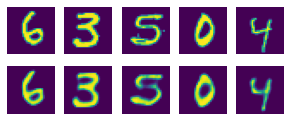

In [7]:
random_test=np.random.randint(X_test.shape[0],size=5)
ae_imgs=autoencoder.predict(X_test)
plt.figure(figsize=(7,2))
for i,image_idx in enumerate(random_test):
  ax=plt.subplot(2,7,i+1)
  plt.imshow(X_test[image_idx].reshape(28,28))
  ax.axis('off')
  ax=plt.subplot(2,7,7+i+1)
  plt.imshow(ae_imgs[image_idx].reshape(28,28))
  ax.axis('off')
plt.show()